In [1]:
from IPython import get_ipython
from IPython.display import display
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score

Load the dataset

In [2]:
df = pd.read_csv("Iris.csv")


Display basic info

In [3]:
print("Dataset Info:")
print(df.info())

print("\nFirst Five Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

First Five Rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           

Check for missing values

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Drop or fill missing values (if any)

In [5]:
df.dropna(inplace=True)

Encode categorical labels

In [6]:
label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])


Verify encoding

In [7]:
print("\nEncoded Labels:")
print(df["Species"].unique())


Encoded Labels:
[0 1 2]


Define features (X) and target (y)

In [8]:
X = df.drop(columns=["Id", "Species"])
y = df["Species"]

Split data into training and testing sets (80-20 split)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize and train the Decision Tree

In [10]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Make predictions

In [11]:
y_pred = model.predict(X_test)

Compute metrics


In [12]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")

print(f"\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Model Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


Convert label_encoder.classes_ from numpy array to a Python list

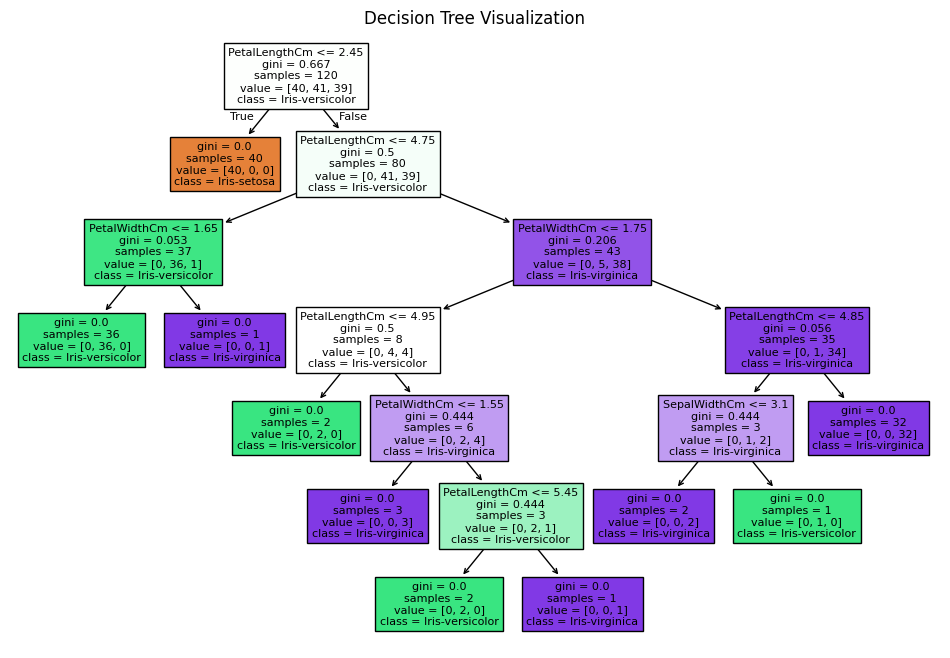

In [13]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=list(X.columns), class_names=list(label_encoder.classes_), filled=True)
plt.title("Decision Tree Visualization")
plt.show()